In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-16 20:19:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 142.251.107.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  78.6MB/s    in 5.3s    

2023-07-16 20:19:38 (92.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
# walking through the dataset
for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_all_data'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in /content/10_food_classes_all_data
there are 10 directories and 0 images in /content/10_food_classes_all_data/train
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/ice_cream
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/steak
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/ramen
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/pizza
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/hamburger
there are 0 directories and 750 images in /content/10_food_classes_all_data/train/grilled_salmon
there are 0 dir

In [3]:
train_dir='/content/10_food_classes_all_data/train/'
test_dir='/content/10_food_classes_all_data/test/'

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
# View a random image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def veiw_random_image(target_dir, target_class):
  # setup target dir
  target_folder = target_dir+target_class
  #get random image's path
  random_image=random.sample(os.listdir(target_folder), 1)
  #read the image
  img=mpimg.imread(target_folder+ '/' +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(img.shape)
  return img

(512, 512, 3)


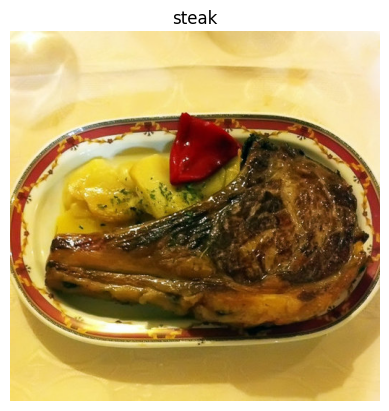

In [6]:
img = veiw_random_image(target_dir = train_dir, target_class=random.choice(class_names))

In [7]:
#prepocess data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
# Create a model same as tinyVGG
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

In [9]:
# Create a model same as tinyVGG
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [10]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [11]:
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 65s 232ms/step - loss: 2.0963 - accuracy: 0.2420 - val_loss: 1.9401 - val_accuracy: 0.3180
Epoch 2/5
235/235 [==============================] - 54s 231ms/step - loss: 1.8599 - accuracy: 0.3548 - val_loss: 1.9448 - val_accuracy: 0.2864
Epoch 3/5
235/235 [==============================] - 53s 227ms/step - loss: 1.5990 - accuracy: 0.4607 - val_loss: 1.9104 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 54s 228ms/step - loss: 1.0166 - accuracy: 0.6643 - val_loss: 2.3153 - val_accuracy: 0.3032
Epoch 5/5
235/235 [==============================] - 62s 265ms/step - loss: 0.3943 - accuracy: 0.8835 - val_loss: 3.4502 - val_accuracy: 0.2828


evaluating the model

<Axes: >

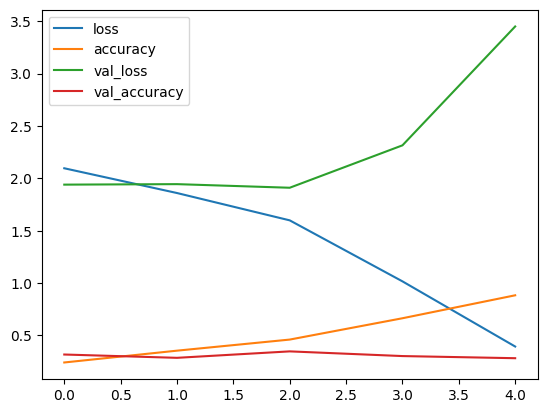

In [12]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

It's clearly an overfitted model. let's reduce overfitting.

In [14]:
# create another model
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [15]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [16]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 55s 225ms/step - loss: 2.1481 - accuracy: 0.2089 - val_loss: 2.0264 - val_accuracy: 0.2472
Epoch 2/5
235/235 [==============================] - 60s 257ms/step - loss: 1.9215 - accuracy: 0.3265 - val_loss: 1.9263 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 61s 259ms/step - loss: 1.7767 - accuracy: 0.3971 - val_loss: 1.8482 - val_accuracy: 0.3468
Epoch 4/5
235/235 [==============================] - 52s 223ms/step - loss: 1.6079 - accuracy: 0.4541 - val_loss: 1.8725 - val_accuracy: 0.3668
Epoch 5/5
235/235 [==============================] - 60s 256ms/step - loss: 1.4060 - accuracy: 0.5277 - val_loss: 1.8794 - val_accuracy: 0.3612


<Axes: >

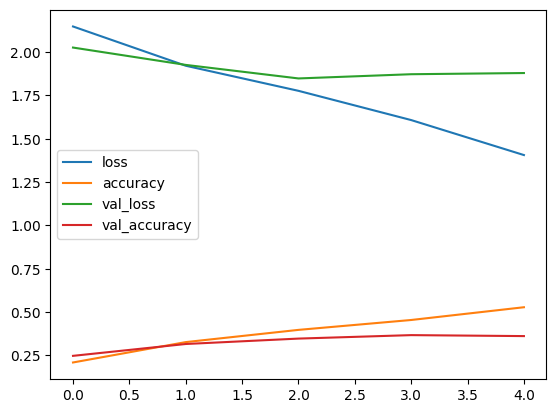

In [17]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [9]:
# Data Augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    #shuffle=False
)
train_data_augmented=train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.


In [21]:
# create a model for Augmented data
model_3 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [24]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [25]:
history_3=model_3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 129s 541ms/step - loss: 2.2583 - accuracy: 0.1463 - val_loss: 2.1172 - val_accuracy: 0.2196
Epoch 2/5
235/235 [==============================] - 135s 572ms/step - loss: 2.1244 - accuracy: 0.2348 - val_loss: 1.9525 - val_accuracy: 0.3148
Epoch 3/5
235/235 [==============================] - 125s 534ms/step - loss: 2.0501 - accuracy: 0.2705 - val_loss: 1.9304 - val_accuracy: 0.3212
Epoch 4/5
235/235 [==============================] - 134s 569ms/step - loss: 2.0070 - accuracy: 0.2944 - val_loss: 1.8801 - val_accuracy: 0.3588
Epoch 5/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9955 - accuracy: 0.3047 - val_loss: 1.8666 - val_accuracy: 0.3620


In [26]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

<Axes: >

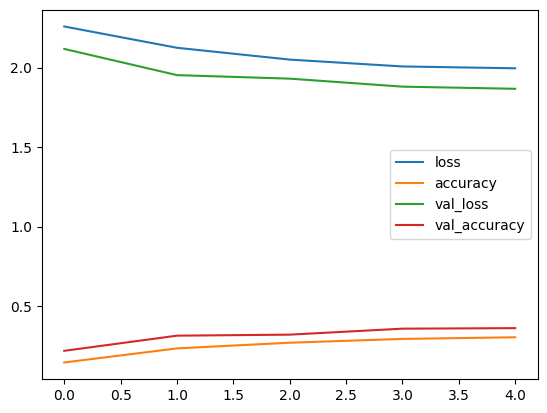

In [27]:
import pandas as pd
pd.DataFrame(history_3.history).plot()

In [10]:
# shuffle augmented data
train_data_augmented_suffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 7500 images belonging to 10 classes.


In [29]:
#model for shuffled dataset
model_4=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [30]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
history_4 = model_4.fit(
    train_data_augmented_suffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_suffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 127s 534ms/step - loss: 2.1860 - accuracy: 0.1883 - val_loss: 2.0263 - val_accuracy: 0.2644
Epoch 2/5
235/235 [==============================] - 127s 540ms/step - loss: 2.0600 - accuracy: 0.2668 - val_loss: 1.9172 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 134s 569ms/step - loss: 2.0057 - accuracy: 0.3019 - val_loss: 1.8575 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 129s 549ms/step - loss: 1.9685 - accuracy: 0.3179 - val_loss: 1.8009 - val_accuracy: 0.3736
Epoch 5/5
235/235 [==============================] - 139s 592ms/step - loss: 1.9475 - accuracy: 0.3201 - val_loss: 1.8220 - val_accuracy: 0.3748


<Axes: >

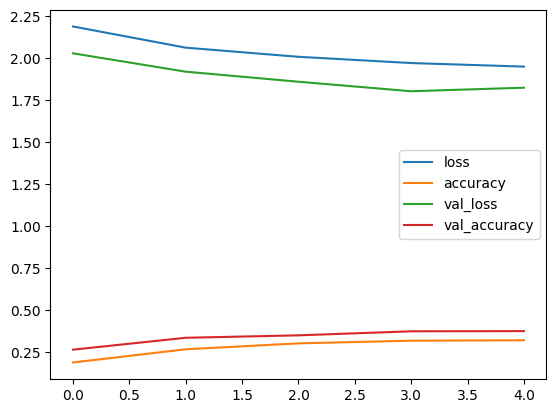

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [34]:
# increase epochs
history_5 = model_4.fit(
    train_data_augmented_suffled,
    epochs=10,
    steps_per_epoch=len(train_data_augmented_suffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
235/235 [==============================] - 133s 565ms/step - loss: 1.9080 - accuracy: 0.3357 - val_loss: 1.9486 - val_accuracy: 0.3196
Epoch 2/10
235/235 [==============================] - 128s 546ms/step - loss: 1.8926 - accuracy: 0.3479 - val_loss: 1.7548 - val_accuracy: 0.3980
Epoch 3/10
235/235 [==============================] - 128s 543ms/step - loss: 1.8612 - accuracy: 0.3615 - val_loss: 1.8960 - val_accuracy: 0.3524
Epoch 4/10
235/235 [==============================] - 128s 543ms/step - loss: 1.8441 - accuracy: 0.3656 - val_loss: 1.7356 - val_accuracy: 0.4084
Epoch 5/10
235/235 [==============================] - 127s 543ms/step - loss: 1.8256 - accuracy: 0.3731 - val_loss: 1.6819 - val_accuracy: 0.4384
Epoch 6/10
235/235 [==============================] - 135s 573ms/step - loss: 1.8023 - accuracy: 0.3788 - val_loss: 1.7171 - val_accuracy: 0.4156
Epoch 7/10
235/235 [==============================] - 127s 541ms/step - loss: 1.7982 - accuracy: 0.3899 - val_loss: 1.6060 -

<Axes: >

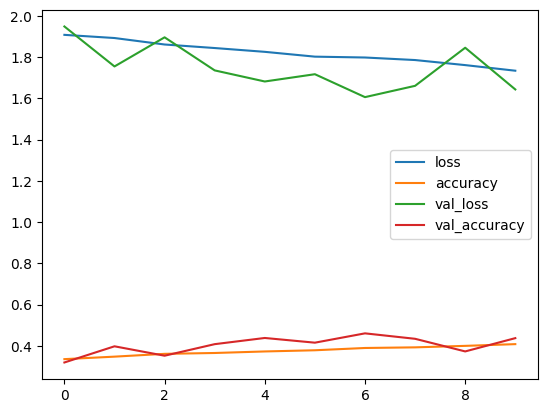

In [35]:
import pandas as pd
pd.DataFrame(history_5.history).plot()

In [12]:
# working with learning rate

model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# increase epochs
history_6 = model_5.fit(
    train_data_augmented_suffled,
    epochs=30,
    steps_per_epoch=len(train_data_augmented_suffled),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[lr_scheduler]
)


Epoch 1/30
235/235 [==============================] - 416s 2s/step - loss: 2.1705 - accuracy: 0.2003 - val_loss: 2.0189 - val_accuracy: 0.2632 - lr: 0.0010
Epoch 2/30
235/235 [==============================] - 448s 2s/step - loss: 2.0392 - accuracy: 0.2749 - val_loss: 1.8589 - val_accuracy: 0.3480 - lr: 0.0011
Epoch 3/30
235/235 [==============================] - 451s 2s/step - loss: 1.9936 - accuracy: 0.2987 - val_loss: 1.8750 - val_accuracy: 0.3536 - lr: 0.0013
Epoch 4/30
235/235 [==============================] - 453s 2s/step - loss: 1.9753 - accuracy: 0.3060 - val_loss: 1.8356 - val_accuracy: 0.3624 - lr: 0.0014
Epoch 5/30
235/235 [==============================] - 415s 2s/step - loss: 1.9577 - accuracy: 0.3169 - val_loss: 1.8930 - val_accuracy: 0.3248 - lr: 0.0016
Epoch 6/30
235/235 [==============================] - 452s 2s/step - loss: 1.9298 - accuracy: 0.3368 - val_loss: 1.7851 - val_accuracy: 0.3848 - lr: 0.0018
Epoch 7/30
235/235 [==============================] - 411s 2s/st

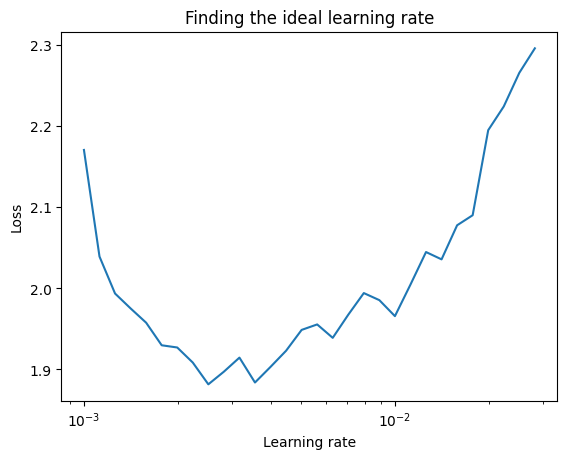

In [15]:


# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(30)/20))
plt.semilogx(lrs, history_6.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");



In [16]:
# working with learning rate

model_6=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=['accuracy'])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# increase epochs
history_7 = model_6.fit(
    train_data_augmented_suffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_suffled),
    validation_data=test_data,
    validation_steps=len(test_data)
    #callbacks=[lr_scheduler]
)


Epoch 1/5
235/235 [==============================] - 452s 2s/step - loss: 2.2527 - accuracy: 0.1491 - val_loss: 2.1329 - val_accuracy: 0.2040
Epoch 2/5
235/235 [==============================] - 456s 2s/step - loss: 2.1476 - accuracy: 0.2183 - val_loss: 2.0734 - val_accuracy: 0.2580
Epoch 3/5
235/235 [==============================] - 413s 2s/step - loss: 2.0575 - accuracy: 0.2676 - val_loss: 1.9384 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 459s 2s/step - loss: 2.0107 - accuracy: 0.2973 - val_loss: 1.8651 - val_accuracy: 0.3588
Epoch 5/5
235/235 [==============================] - 466s 2s/step - loss: 1.9730 - accuracy: 0.3115 - val_loss: 1.8393 - val_accuracy: 0.3684


In [17]:
# working with learning rate

model_7=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),

    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),

    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),

    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_7.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# increase epochs
history_8 = model_7.fit(
    train_data_augmented_suffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_suffled),
    validation_data=test_data,
    validation_steps=len(test_data)
    #callbacks=[lr_scheduler]
)


Epoch 1/5
235/235 [==============================] - 819s 3s/step - loss: 2.2299 - accuracy: 0.1605 - val_loss: 2.1537 - val_accuracy: 0.2024
Epoch 2/5
235/235 [==============================] - 778s 3s/step - loss: 2.1184 - accuracy: 0.2283 - val_loss: 2.0353 - val_accuracy: 0.2688
Epoch 3/5
235/235 [==============================] - 829s 4s/step - loss: 2.0616 - accuracy: 0.2655 - val_loss: 1.8755 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 797s 3s/step - loss: 2.0090 - accuracy: 0.2999 - val_loss: 1.8542 - val_accuracy: 0.3568
Epoch 5/5
235/235 [==============================] - 778s 3s/step - loss: 1.9683 - accuracy: 0.3141 - val_loss: 1.8010 - val_accuracy: 0.3840
